## Homework 9 (Due April 29th - Two weeks from now)
  ### Putting it all together(at last!)

**** DANGER!!! ****
***DO NOT PUSH THE CSV file TO YOUR REPO!!! IT WILL BREAK IT and YOU WILL HAVE TO DO A LOT OF WORK TO RESET YOUR REPO***

## Objectives

- Explore and glean insights from a real dataset using pandas
- Practice using pandas for exploratory analysis, information gathering, and discovery
- Practice using matplotlib for data visualization

## Dataset

You are to analyze campaign contributions to the 2016 U.S. presidential primary races made in California. Use the csv file located here: https://drive.google.com/file/d/1Lgg-PwXQ6TQLDowd6XyBxZw5g1NGWPjB/view?usp=sharing. You should download and save this file in the same folder as this notebook is stored.  This file originally came from the U.S. Federal Election Commission (https://www.fec.gov/).

** DO NOT PUSH THIS FILE TO YOUR GITHUB REPO !!! ** IF YOU DO>>>>IT WILL BREAK YOUR REPO AND YOU'LL HAVE TO DO A LOT OF WORK TO FIX IT!!!

Documentation for this data can be found here: https://drive.google.com/file/d/11o_SByceenv0NgNMstM-dxC1jL7I9fHL/view?usp=sharing

## General Guidelines:

- This is a **real** dataset and so it may contain errors and other pecularities to work through
- This dataset is ~218mb, which will take some time to load (and probably won't load in Google Sheets or Excel)
- If you make assumptions, annotate them in your responses
- While there is one code/markdown cell positioned after each question as a placeholder, some of your code/responses may require multiple cells
- Double-click the markdown cells that say YOUR ANSWER HERE to enter your written answers. If you need more cells for your written answers, make them markdown cells (rather than code cells)

## Setup

Run the two cells below. 

The first cell will load the data into a pandas dataframe named `contrib`. Note that a custom date parser is defined to speed up loading. If Python were to guess the date format, it would take even longer to load.  

The second cell subsets the dataframe to focus on just the primary period through May 2016. Otherwise, we would see general election donations which would make it harder to draw conclusions about the primaries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# These commands below set some options for pandas and to have matplotlib show the charts in the notebook
pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline

# Define a date parser to pass to read_csv
d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')

# Load the data
contrib = pd.read_csv('./P00000001-CA.csv', index_col=False, parse_dates=['contb_receipt_dt'], date_parser=d)
print(contrib.shape)

# Note - for now, it is okay to ignore the warning about mixed types. 

C:\Users\Libby\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
<ipython-input-1-53e35c6b6473>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d = lambda x: pd.datetime.strptime(x, '%d-%b-%y')


(1125659, 18)


In [2]:
# Subset data to primary period 
contrib = contrib.copy()[contrib['contb_receipt_dt'] <= datetime.datetime(2016, 5, 31)]
print(contrib.shape)

(654502, 18)


## 1. Data  Exploration (20 points)

**1a. First, take a preliminary look at the data.**
- Print the *shape* of the data. What does this tell you about the number of variables and rows you have?
- Print a list of column names. 
- Review the documentation for this data (link above). Do you have all of the columns you expect to have? What does each column mean?
- Sometimes variable names are not clear unless we read the documentation. In your own words, based on the documentation, what information does the `election_tp` variable contain?

In [62]:
# 1a YOUR CODE HERE
print(contrib.shape)

(654502, 18)


In [63]:
for column in contrib.columns: #iterate over column names
    print(column)

cmte_id
cand_id
cand_nm
contbr_nm
contbr_city
contbr_st
contbr_zip
contbr_employer
contbr_occupation
contb_receipt_amt
contb_receipt_dt
receipt_desc
memo_cd
memo_text
form_tp
file_num
tran_id
election_tp


`1a YOUR RESPONSE HERE`
The shape of the data returns the tuple (654502, 18). This tells us that there are 654,502 rows, or entries, and 18 columns, or variables.

This data provides columns for committee ID and candidate ID, which are codes assigned by the FEC; the candidate's name; the contributor's name; the city, state, and zip code of the contributor; the contributor's occupation; the amount and date of contribution received; additional notes about the contribution provided by the FEC; a memo code noting whether there is additional information; memo text, which is the additional information if applicable; the form type of the contribution; the file number and transaction ID assigned by the FEC; and what type of election the contribution was for. If I had to identify a column I think is missing, it would probably be a cumulative contribution column that keeps track of multiple contributions by the same donor (in light of campaign finance laws).

The election_tp variable provides information on what kind of election the contribution was provided for: primary, general, other, convention, runoff, special, recount. It assigns each of these a one-letter code which is combined with the year of the election for which the contribution was made.

**1b. Print the first 5 rows from the dataset using head() to manually look through some of your data.**

In [64]:
# 1b YOUR CODE HERE
print(contrib.head())

     cmte_id    cand_id                  cand_nm          contbr_nm  \
0  C00575795  P00003392  Clinton, Hillary Rodham         AULL, ANNE   
1  C00575795  P00003392  Clinton, Hillary Rodham  CARROLL, MARYJEAN   
2  C00575795  P00003392  Clinton, Hillary Rodham   GANDARA, DESIREE   
3  C00577130  P60007168         Sanders, Bernard          LEE, ALAN   
4  C00577130  P60007168         Sanders, Bernard   LEONELLI, ODETTE   

     contbr_city contbr_st     contbr_zip            contbr_employer  \
0       LARKSPUR        CA 949,391,913.00                        NaN   
1        CAMBRIA        CA 934,284,638.00                        NaN   
2        FONTANA        CA 923,371,507.00                        NaN   
3      CAMARILLO        CA 930,111,214.00  AT&T GOVERNMENT SOLUTIONS   
4  REDONDO BEACH        CA 902,784,310.00   VERICOR ENTERPRISES INC.   

   contbr_occupation  contb_receipt_amt contb_receipt_dt receipt_desc memo_cd  \
0            RETIRED              50.00       2016-04-26   

**1c. Pick three variables from the dataset above and run some quick sanity checks.**

When working with a new dataset, it is important to explore and sanity check your variables.  For example, you may want to examine the maximum and minimum values, a frequency count, or something else. Use markdown cells to explain if your sanity checks "pass" your scrutiny or if you have concerns about the integrity of your data. 

In [65]:
# 1c YOUR CODE HERE for variable #1

contrib_max = contrib['contb_receipt_amt'].max() #checks largest contribution amount
contrib_min = contrib['contb_receipt_amt'].min() #checks smallest

print(contrib_max)
print(contrib_min)



10800.0
-10000.0


The max contribution amount passes the sanity test in my opinion. However, the minimum amount -$10,000 does seem concerning. I am not sure what a negative campaign contribution would be. Perhaps a candidate refunded a contribution?

In [66]:
# 1c YOUR CODE HERE for variable #2

for value in contrib['contbr_st']:
    if value != 'CA':
        print(value)

This variable passes the sanity test. I wanted to check the contributor state column to make sure there were not any values other than 'CA', since this data is supposed to be for California only.

In [67]:
# 1c YOUR CODE HERE for variable #3

form_count = contrib['form_tp'].value_counts()

print(form_count)


SA17A    629741
SA18      20240
SB28A      4521
Name: form_tp, dtype: int64


`1c YOUR RESPONSE HERE`

For my third variable, I wanted to confirm that the documentation for the spreadsheet was correct that there were only 3 possible responses for the variable form_tp. The results pass the sanity check as there weren't any unexpected values.

**1d. Plotting a histogram** 

Make a histogram of **three** of the variables you picked above. What are some insights that you can see from this histogram? What information do you get for the sanity check that is not shown in the histogram? 
Remember to include on your histogram:
- Include a title
- Include axis labels
- The correct number of bins to see the breakout of values
- Hint: For some variables the range of values is very large. To do a better exploration, make the initial histogram the full range and then you can make a smaller histogram 'zoomed' in on a discreet range.

Text(0, 0.5, 'Number of Donors')

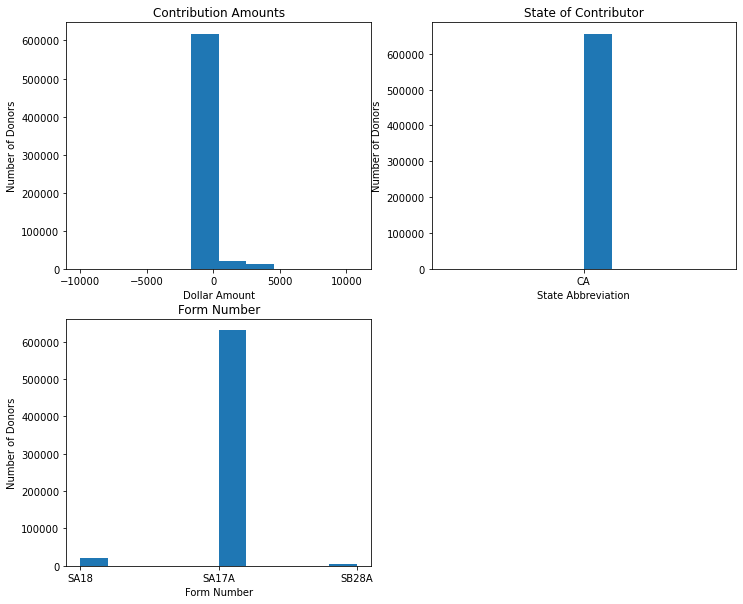

In [68]:
# 1d YOUR CODE HERE

fig = plt.figure(figsize= (12, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(contrib.contb_receipt_amt)
ax2.hist(contrib.contbr_st)
ax3.hist(contrib.form_tp)

ax1.set_title('Contribution Amounts')
ax1.set_xlabel('Dollar Amount')
ax1.set_ylabel('Number of Donors')
ax2.set_title('State of Contributor')
ax2.set_xlabel('State Abbreviation')
ax2.set_ylabel('Number of Donors')
ax3.set_title('Form Number')
ax3.set_xlabel('Form Number')
ax3.set_ylabel('Number of Donors')

Text(0, 0.5, 'Number of Donors')

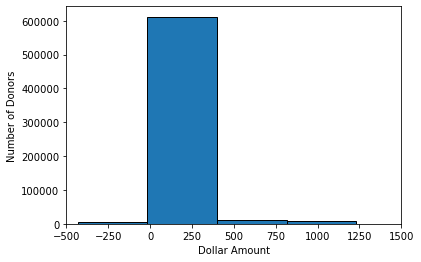

In [80]:
plt.xlim(-500, 1500)
#set limits around most common contrib amt
plt.hist(contrib.contb_receipt_amt, edgecolor='black', bins=50)
#change bin number to get more exact shape
plt.xlabel('Dollar Amount')
plt.ylabel('Number of Donors')


`1d YOUR RESPONSE HERE`

The contribution amounts histogram is not as informative as the sanity check because viewed from a fully zoomed out standpoint, you can't see the large negative values. Even when you zoom in on the data, the bar widths make it difficult to determine how many people actually contributed what amounts.

## 2. Exploring Campaign Contributions (30 points)

Let's investigate the donations to the candidates.

**2a. Present a table that shows the number of donations to each candidate sorted by number of donations.**

- When presenting data as a table, it is often best to sort the data in a meaningful way. This makes it easier for your reader to examine what you've done and to glean insights.  From now on, all tables that you present in this assignment (and course) should be sorted.
- Hint: Use the `groupby` method.
- Hint: Use the `sort_values` method to sort the data so that candidates with the largest number of donations appear on top. 

Which candidate received the largest number of contributions (variable 'contb_receipt_amt')?

In [81]:
# 2a YOUR CODE HERE

#groups using name and number of entries through count method
contrib_grouped = contrib.groupby('cand_nm')['contb_receipt_amt'].count() 

contrib_grouped.sort_values(ascending=False)
#sort in descending order to show most first

cand_nm
Sanders, Bernard             371795
Clinton, Hillary Rodham      163509
Cruz, Rafael Edward 'Ted'     57136
Carson, Benjamin S.           27342
Rubio, Marco                  14089
Fiorina, Carly                 4696
Paul, Rand                     4256
Bush, Jeb                      3114
Kasich, John R.                2988
Trump, Donald J.               2255
Walker, Scott                   713
Huckabee, Mike                  531
O'Malley, Martin Joseph         397
Lessig, Lawrence                372
Graham, Lindsey O.              342
Christie, Christopher J.        333
Stein, Jill                     197
Perry, James R. (Rick)          116
Webb, James Henry Jr.           106
Santorum, Richard J.             84
Johnson, Gary                    77
Jindal, Bobby                    31
Pataki, George E.                20
Gilmore, James S III              3
Name: contb_receipt_amt, dtype: int64

`2a YOUR RESPONSE HERE`

Bernie Sanders received the largest number of contributions.

**2b. Now, present a table that shows the total value of donations to each candidate. sorted by total value of the donations**

Which candidate raised the most money in California?

In [82]:
# 2b YOUR CODE HERE

#add up all contributions using sum
amount_grouped = contrib.groupby('cand_nm')['contb_receipt_amt'].sum()

amount_grouped.sort_values(ascending=False)
#set to descending


cand_nm
Clinton, Hillary Rodham     39,368,777.01
Sanders, Bernard            18,773,871.31
Cruz, Rafael Edward 'Ted'    6,286,460.34
Rubio, Marco                 4,846,483.72
Bush, Jeb                    3,325,536.83
Carson, Benjamin S.          2,952,109.00
Kasich, John R.              1,553,823.54
Fiorina, Carly               1,468,489.42
Trump, Donald J.               893,356.89
Paul, Rand                     797,624.29
Walker, Scott                  495,006.90
Christie, Christopher J.       456,066.00
Graham, Lindsey O.             408,595.00
O'Malley, Martin Joseph        297,834.26
Huckabee, Mike                 230,890.60
Perry, James R. (Rick)         208,400.00
Lessig, Lawrence               186,144.50
Webb, James Henry Jr.           76,568.16
Johnson, Gary                   41,187.60
Santorum, Richard J.            36,304.88
Pataki, George E.               30,450.00
Stein, Jill                     27,918.00
Jindal, Bobby                   23,231.26
Gilmore, James S III      

`2b YOUR RESPONSE HERE`

Hillary Clinton raised the most money in California.

**2c. Combine the tables (sorted by either a or b above).**

- What is the "type" of the two tables you presented above - Series or DataFrames?
- Convert any Series to DataFrames.
- Rename the variable (column) names to accurately describe what is presented.
- Merge together your tables to show the *count* and the *value* of donations to each candidate in one table.
- Hint: Use the `merge` method.

The tables I presented above are both Series.

In [83]:
# 2c YOUR CODE HERE

#first make dataframes
df_contrib_grouped = contrib_grouped.to_frame()
df_amount_grouped = amount_grouped.to_frame()

#concatenate into single df
df_combined = pd.concat([df_amount_grouped, df_contrib_grouped], axis=1)
#rename df columns
df_combined.columns = ['Total contributions', 'Number of contributions']

#sort according to total amount
print(df_combined.sort_values(by=['Total contributions'], ascending=False))




                           Total contributions  Number of contributions
cand_nm                                                                
Clinton, Hillary Rodham          39,368,777.01                   163509
Sanders, Bernard                 18,773,871.31                   371795
Cruz, Rafael Edward 'Ted'         6,286,460.34                    57136
Rubio, Marco                      4,846,483.72                    14089
Bush, Jeb                         3,325,536.83                     3114
Carson, Benjamin S.               2,952,109.00                    27342
Kasich, John R.                   1,553,823.54                     2988
Fiorina, Carly                    1,468,489.42                     4696
Trump, Donald J.                    893,356.89                     2255
Paul, Rand                          797,624.29                     4256
Walker, Scott                       495,006.90                      713
Christie, Christopher J.            456,066.00                  

**2d. Calculate and add a new variable to the table from 2c that shows the average \$ per donation. Print this table sorted by the average donation**

In [84]:
# 2d YOUR CODE HERE

#create new Series grouped by avg donation amount
mean_grouped = contrib.groupby('cand_nm')['contb_receipt_amt'].mean()
#convert to df
df_mean_grouped = mean_grouped.to_frame()

#create new big df
new_df_combined = pd.concat([df_mean_grouped, df_amount_grouped, df_contrib_grouped], axis=1)
new_df_combined.columns = ['Average contribution amount','Total contributions', 'Number of contributions']
print(new_df_combined.sort_values(by=['Average contribution amount'], ascending=False))



                           Average contribution amount  Total contributions  \
cand_nm                                                                       
Gilmore, James S III                          2,700.00             8,100.00   
Perry, James R. (Rick)                        1,796.55           208,400.00   
Pataki, George E.                             1,522.50            30,450.00   
Christie, Christopher J.                      1,369.57           456,066.00   
Graham, Lindsey O.                            1,194.72           408,595.00   
Bush, Jeb                                     1,067.93         3,325,536.83   
O'Malley, Martin Joseph                         750.21           297,834.26   
Jindal, Bobby                                   749.40            23,231.26   
Webb, James Henry Jr.                           722.34            76,568.16   
Walker, Scott                                   694.26           495,006.90   
Johnson, Gary                                   534.

**2e. Plotting a Bar Chart**

Make a single bar chart that shows two different bars per candidate with one bar as the total value of the donations and the other as average $ per donation. 
- Show the Candidates Name on the x-axis
- Show the amount on the y-axis
- Include a title
- Include axis labels
- Make the y-axis a log-scale to show both numbers!

Text(0.5, 1.0, 'Total and Average Contributions for Political Candidates')

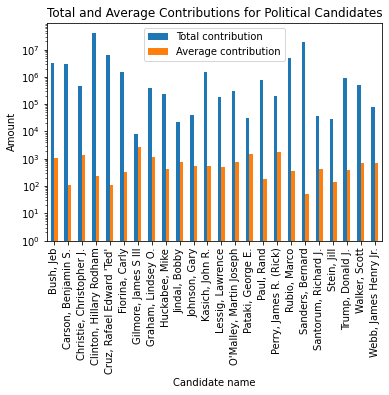

In [85]:
# 2e YOUR CODE HERE

#create df
df_for_bar = pd.concat([df_amount_grouped, df_mean_grouped], axis=1)

#make it a bar graph w/ log scale
my_bar = df_for_bar.plot(kind='bar', log=True)
my_bar.set_xlabel('Candidate name')
my_bar.set_ylabel('Amount')
my_bar.legend(['Total contribution', 'Average contribution'])
my_bar.set_title('Total and Average Contributions for Political Candidates')

**2f. Comment on the results of your data analysis in a short paragraph.**

- There are several interesting conclusions you can draw from the table you have created.
- What have you learned about campaign contributions in California?
- We are looking for data insights here rather than comments on the code!

`2f YOUR RESPONSE HERE`

First, it is interesting to note that Bernie Sanders had the lowest average contribution amount, yet raised the second highest amount of money behind Hillary Clinton. This tells us that a large number of people were contributing small amounts to his campaign in California, which supports the assumption that his was a grassroots campaign.

I also found it interesting that after the top two Democratic candidates, the top contribution recipients were Republican challengers to Donald Trump. This not only suggests that California Republican participate actively in politics, contrary to the stereotype of California as blue through and through, it also says that California Republicans were highly against Trump's selection as presidential nominee.

## 3. Exploring Donor Occupations (30 points)

Above in part 2, we saw that some simple data analysis can give us insights into the campaigns of our candidates. Now let's quickly look to see what *kind* of person is donating to each campaign using the `contbr_occupation` variable.

**3a. Show the top 5 occupations of individuals that contributed to Hillary Clinton.** 

- Subset your data to create a dataframe with only donations for Hillary Clinton.
- Then use the `value_counts` and `head` methods to present the top 5 occupations (`contbr_occupation`) for her donors.
- Note: we are just interested in the count of donations, not the value of those donations.

In [86]:
# 3a YOUR CODE HERE

#create new df using Hillary's ID number
contrib_hillary = contrib.copy()[contrib['cand_id'] == 'P00003392']

#sort according to occupation column
hillary_occupations = contrib_hillary.value_counts(['contbr_occupation'])

#show top 5
hillary_occupations.head()



contbr_occupation    
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
dtype: int64

**3b. Write a function called `get_donors`.**

Imagine that you want to do the previous operation on several candidates.  To keep your work neat, you want to take the work you did on the Clinton-subset and wrap it in a function that you can apply to other subsets of the data.

- The function should take a DataFrame as a parameter, and return a Series containing the counts for the top 5 occupations contained in that DataFrame.

In [87]:
def get_donors(df):
    """This function takes a dataframe that contains a variable named contbr_occupation.
    It outputs a Series containing the counts for the 5 most common values of that
    variable."""
    
    # 3b YOUR CODE HERE
    
    return df.value_counts(['contbr_occupation']).head()

**3c. Now run the `get_donors` function on subsets of the dataframe corresponding to three candidates. Show each of the three candidates below.**

- Hillary Clinton
- Bernie Sanders
- Donald Trump

In [88]:
# 3c YOUR CODE HERE

get_donors(contrib_hillary)

contbr_occupation    
RETIRED                  33450
ATTORNEY                  7315
INFORMATION REQUESTED     4742
TEACHER                   3591
HOMEMAKER                 3436
dtype: int64

In [89]:
contrib_bernie = contrib.copy()[contrib['cand_id'] == 'P60007168']

get_donors(contrib_bernie)

contbr_occupation
NOT EMPLOYED         96371
RETIRED              15048
TEACHER              10167
SOFTWARE ENGINEER     7861
ENGINEER              7094
dtype: int64

In [90]:
contrib_donald = contrib.copy()[contrib['cand_id'] == 'P80001571']

get_donors(contrib_donald)


contbr_occupation    
RETIRED                  849
INFORMATION REQUESTED     70
CEO                       57
OWNER                     51
PRESIDENT                 35
dtype: int64

**3d. Finally, use `groupby` to separate the entire dataset by candidate.**

- Call .apply(get_donors) on your groupby object, which will apply the function you wrote to each subset of your data.
- Look at your output and marvel at what pandas can do in just one line!

In [91]:
# 3d YOUR CODE HERE

occupation_grouped = contrib.groupby('cand_nm').apply(get_donors)

occupation_grouped.head(20)

cand_nm                   contbr_occupation                     
Bush, Jeb                 RETIRED                                     996
                          HOMEMAKER                                   180
                          ATTORNEY                                     92
                          Q.A.                                         89
                          PRESIDENT                                    84
Carson, Benjamin S.       RETIRED                                   13692
                          INFORMATION REQUESTED PER BEST EFFORTS     1614
                          HOMEMAKER                                  1049
                          PHYSICIAN                                   329
                          R.N.                                        234
Christie, Christopher J.  RETIRED                                      38
                          NONE                                         22
                          CONSULTANT           

**3e. Comment on your data insights & findings in a short paragraph.**

`3e YOUR RESPONSE HERE`

Retirees appear to be the most active contributors to political campaigns in general, which makes sense since they often have more time and capital to devote to politics. Interestingly, the vast majority of Bernie Sanders' donors were listed as unemployed. I wonder if, since his demographic often skewed younger, many of his donors were students or gig workers, both of which might be categorized as unemployed by older classification systems. After these more ambiguous entries, it seems like the highly educated technocrats of California (software engineers and engineers) skewed towards supporting Bernie. It is also interesting that Hillary Clinton received a large portion of contributions from "Homemakers," who typically skew female. Goes to show how much women did not want Trump to be elected? Unsurprisingly, Donald Trump's donors came overwhelmingly from positions of economic power, such as CEO, owner and president. What's more surprising is that across the board teachers are avid political contributors, despite their very low salaries.

**3f. Think about your findings in section 3 vs. your findings in section 2 of this assignment.**

Do you have any new data insights into the results you saw in section 2 now that you see the top occupations for each candidate?

`3f YOUR RESPONSE HERE`

Now that I can see the breakdown of donor occupations, the low average contribution by Bernie Sanders supporters is easier to understand. These small contributions are not a sign of lack of enthusiasm, but rather a wave of enthusiasm by people with much less money to give. This breakdown also draws much more attention to the power of the retired vote, which then begs the question of how Republicans are convincing elderly voters to vote for them while also pledging to cut programs like Social Security and Medicare.


## 4. Plotting Data (20 points)

There is an important element that we have not yet explored in this dataset - time.

**4a. Present a single line chart with the following elements.**

- Show the date on the x-axis
- Show the contribution amount on the y-axis
- Include a title
- Include axis labels

Text(0.5, 1.0, 'Contributions by Date')

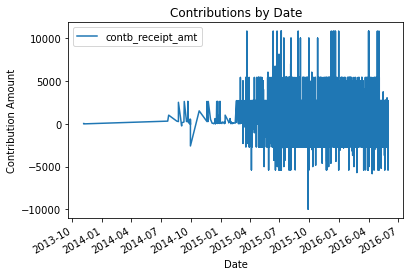

In [92]:
# 4a YOUR CODE HERE


first_date_plot = contrib.plot(kind='line', x='contb_receipt_dt', y='contb_receipt_amt')
first_date_plot.set_xlabel('Date')
first_date_plot.set_ylabel('Contribution Amount')
first_date_plot.set_title('Contributions by Date')

**4b. Make a better time-series line chart**

This chart is messy and it is hard to gain insights from it.  Improve the chart from 4a so that your new chart shows a specific insight. In the spot provided, write the insight(s) that can be gained from this new time-series line chart.

(0.0, 6000.0)

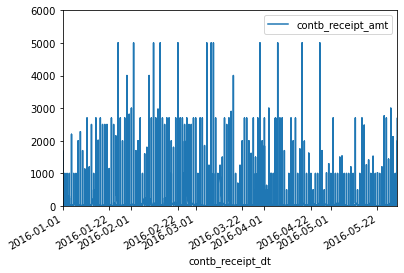

In [93]:
# 4b YOUR CODE HERE

bernie_date_plot = contrib_bernie.plot(kind='line', x='contb_receipt_dt', y='contb_receipt_amt')
bernie_date_plot.set_xlim(['2016-01-01', '2016-05-31'])
bernie_date_plot.set_ylim(0, 6000)



`4b YOUR RESPONSE HERE`

The zoomed in data shows that throughout early 2016 as primaries kicked off, Bernie Sanders' supporters kept up a fairly consistent stream of contributions. However, as primary season dragged on and the Democratic party threw its full weight behind Hillary, we see the contributions begin to taper off. Suddenly, amounts that were only middling just months before are the highest amounts being contributed.

## 5. Bonus (20 points)

For your final project, you may be interested in plotting data on maps. Explore the Plotly library, and try plotting a bubble map (https://plotly.com/python/bubble-maps/) of the total amount and total number of campaign contributions for each city in California. You would need to match the cities with their respective coordinates and then adjust the size of the bubble according to the values on each city. 

In [ ]:
!pip install plotly

In [3]:
import plotly.express as px

In [4]:
import plotly.graph_objects as go

In [12]:
left_df = pd.read_csv('cal_cities_lat_long.csv', index_col = 'contbr_city')
#get city coords

In [54]:
city_sums = pd.DataFrame(contrib.groupby('contbr_city')['contb_receipt_amt'].sum())
#create new df with just city and dollar amount for convenience

In [56]:
city_sums.reset_index(drop=False, inplace=True)
#create new index

In [94]:
#check that it worked
city_sums.head()

,contbr_city,contb_receipt_amt
0,*MORENO VALLEY,100.00
1,29 PALMS,"2,828.85"
2,91355,28.00
3,ACAMPO,"3,086.53"
4,ACTON,"6,819.76"


In [58]:
map_df = left_df.merge(city_sums, on='contbr_city', how='left')        
#merge them to match city to coordinates

In [59]:
map_df = map_df.sort_values(by=["contb_receipt_amt"], ascending=False)
map_df.reset_index(drop=True, inplace=True)
#sort the new df and reset its index

In [60]:
map_df.head()

,contbr_city,Latitude,Longitude,contb_receipt_amt
0,LOS ANGELES,34.05,-118.24,"9,644,176.63"
1,SAN FRANCISCO,37.77,-122.42,"7,519,039.37"
2,BEVERLY HILLS,34.07,-118.40,"2,129,458.08"
3,SAN DIEGO,32.72,-117.16,"2,019,730.08"
4,SANTA MONICA,34.02,-118.49,"1,690,736.07"


In [35]:
#set my map scale
stages = ["9000000+", "5000000-8999999", "1000000-4999999", "500000-999999", "100000-499999", "50000-99999",
         "10000-49999", "5000-9999", "1-4999"]

#create tuples of row indexes 
tuple1 = (0, map_df[map_df.contb_receipt_amt > 9000000].index[-1]+1)
tuple2 = (tuple1[1], map_df[(map_df.contb_receipt_amt > 5000000) & (map_df.contb_receipt_amt <=8999999)].index[-1]+1)
tuple3 = (tuple2[1], map_df[(map_df.contb_receipt_amt > 1000000) & (map_df.contb_receipt_amt <=4999999)].index[-1]+1)
tuple4 = (tuple3[1], map_df[(map_df.contb_receipt_amt > 500000) & (map_df.contb_receipt_amt <=999999)].index[-1]+1)
tuple5 = (tuple4[1], map_df[(map_df.contb_receipt_amt > 100000) & (map_df.contb_receipt_amt <=499999)].index[-1]+1)
tuple6 = (tuple5[1], map_df[(map_df.contb_receipt_amt > 50000) & (map_df.contb_receipt_amt <=99999)].index[-1]+1)
tuple7 = (tuple6[1], map_df[(map_df.contb_receipt_amt > 10000) & (map_df.contb_receipt_amt <=49999)].index[-1]+1)
tuple8 = (tuple7[1], map_df[(map_df.contb_receipt_amt > 5000) & (map_df.contb_receipt_amt <=9999)].index[-1]+1)
tuple9 = (tuple8[1], map_df[map_df.contb_receipt_amt <=4999].index[-1]+1)

limits = [tuple1, tuple2, tuple3, tuple4, tuple5, tuple6, tuple7, tuple8, tuple9]
limits

[(0, 1),
 (1, 2),
 (2, 11),
 (11, 18),
 (18, 118),
 (118, 197),
 (197, 340),
 (340, 376),
 (376, 449)]

In [36]:
#set my bubble colors
colors = ['#F0F8FF','#A1CAF1', '#6495ED', '#007FFF', '#1560BD', '#0F4D92', '#003366', '#4682B4', '#002E63']

In [61]:
fig = go.Figure()
stage_counter = 0
for i in range(len(limits)):
    lim = limits[i]
    df_sub = map_df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['Longitude'],
        lat = df_sub['Latitude'],
        text = df_sub['contbr_city'],
        marker = dict(
            size = df_sub['contb_receipt_amt']*0.0002,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{}'.format(stages[stage_counter])))
    stage_counter = stage_counter+1
    
fig.update_layout(
        title_text = 'Contribution Amount by City',
        title_x=0.5,
        showlegend = True,
        legend_title = 'Contributions in Dollars',
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
            projection=go.layout.geo.Projection(type = 'albers usa'),
        )
    )

fig.show()